In [37]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### This file contains different type of Regressions and their implementation in Python. Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables). In this file, we will discuss the following types of regressions:
#### 1. Linear Regression
#### 2. Polynomial Regression
#### 3. Ridge Regression
#### 4. Lasso Regression
#### 5. Elastic Net Regression
#### 6. Support Vector Regression



In [38]:
X, Y = datasets.load_diabetes(return_X_y=True)
# print(X.shape)
# print(Y.shape)
# print(X[:5])
# print(Y[:5])

X = X[:, np.newaxis, 2] # Use only one feature
# print(X.shape)
# print(X[:5])


# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

Y_train = Y[:-20]
Y_test = Y[-20:]

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Cofficient of determination: 0.47
Coefficients: 
 [510.71765764]
Mean squared error: 3439.70
Cofficient of determination: 0.29
Coefficients: 
 [584.98294002]
Mean squared error: 3226.55
Cofficient of determination: 0.33
Coefficients: 
 [94.53475983]
Mean squared error: 5087.46
Cofficient of determination: -0.05


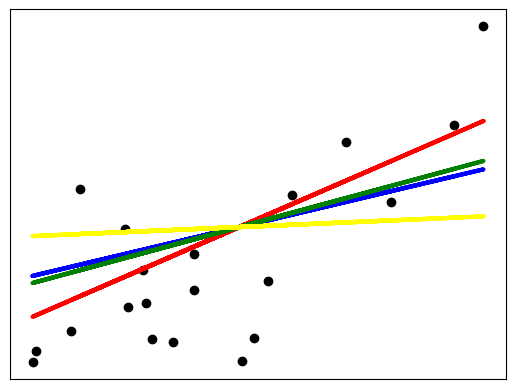

In [39]:


## Linear Regression

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_pred_linear = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred_linear))
print("Cofficient of determination: %.2f" % r2_score(Y_test, Y_pred_linear))




# rideg regression
regr = linear_model.Ridge(alpha=0.8)
regr.fit(X_train, Y_train)
Y_pred_ridge = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred_ridge))
print("Cofficient of determination: %.2f" % r2_score(Y_test, Y_pred_ridge))


# Lasso regression
regr = linear_model.Lasso(alpha=0.8)
regr.fit(X_train, Y_train)
Y_pred_lasso = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred_lasso))
print("Cofficient of determination: %.2f" % r2_score(Y_test, Y_pred_lasso))

# ElasticNet regression
regr = linear_model.ElasticNet(alpha=0.04)
regr.fit(X_train, Y_train)
Y_pred_elastic = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred_elastic))
print("Cofficient of determination: %.2f" % r2_score(Y_test, Y_pred_elastic))



plt.scatter(X_test, Y_test, color='black')
plt.plot(X_test, Y_pred_ridge, color='blue', linewidth=3)
plt.plot(X_test, Y_pred_linear, color='red', linewidth=3)
plt.plot(X_test, Y_pred_lasso, color='green', linewidth=3)
plt.plot(X_test, Y_pred_elastic, color='yellow', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


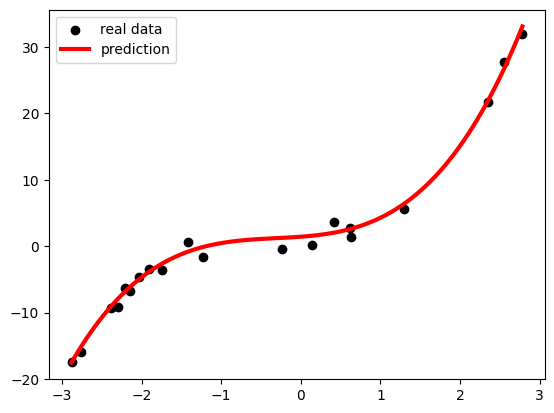

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Polynomial regression,the nonlinear relationship is y = x^3 + x^2 + x + 1 + noise
np.random.seed(0)
X = 6* np.random.rand(100, 1) - 3 
Y = X**3 + X**2 + X + 1 + np.random.randn(100, 1) # Add some noise

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regr = linear_model.LinearRegression()
regr.fit(X_train_poly, Y_train)
Y_pred = regr.predict(X_test_poly)

plt.scatter(X_test, Y_test, color='black', label='real data')

x_range = np.linspace(min(X_test), max(X_test), 100).reshape(-1, 1)
X_range_poly = poly.fit_transform(x_range)
Y_range = regr.predict(X_range_poly)

plt.plot(x_range, Y_range, color='red', linewidth=3, label='prediction')
plt.legend()
plt.show()

